<a href="https://colab.research.google.com/github/harry-rendell/MLworkshop/blob/main/incomplete_simple_dense_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Set-up: Run the following cell to clone the repository to your Colab filespace.

In [ ]:
!git clone https://github.com/harry-rendell/MLworkshop.git
import sys
sys.path.append('./MLworkshop')

fatal: destination path 'MLworkshop' already exists and is not an empty directory.


# Introduction
---
We are going to build and train a simple neural network to classify the MNIST dataset. This dataset contains 1,796 grayscale images of handwritten digits from 0 to 9. Although this is an easy task for a human, it's not so easy for a computer. Since every image in the database is unique, we need a model which can adapt to different handwriting styles and classify them accurately. This is where machine learning comes in!

## Tips!
* Shift+Tab while cursor is in a function will give you information about the function

In [ ]:
# Standard imports
import numpy as np
import matplotlib.pyplot as plt
# Keras imports
from tensorflow.python.keras.utils.vis_utils import plot_model
from tensorflow.python.keras.models import Model
from tensorflow.python.keras.layers import Input, Dense, Flatten, Reshape, Dropout
from tensorflow.keras.regularizers import l1_l2
# Custom imports
from funcs.plotting import plot_classifications, plot_training, plot_data

In [ ]:
from sklearn import datasets
digits = datasets.load_digits()
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(digits.images, digits.target, test_size=0.5, shuffle=True)

In [ ]:
x_train = x_train/x_train.max() # Normalise data so pixel values are between 0 and 1
input_shape  = (8,8)
output_shape = 10 # we have 10 different classes, ie 10 integers from 0 to 9

# Plot the data
---
### Let's see what we're working with here.

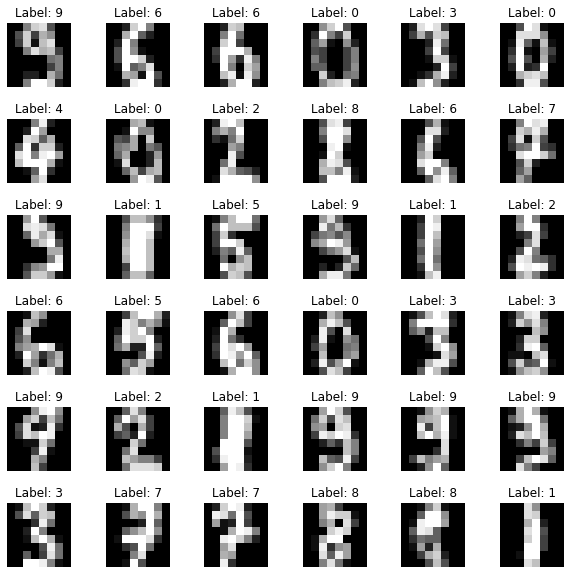

In [ ]:
plot_data(x_train, y_train)

# Making your model
---
### This is the basic structure of constructing a dense neural network using Keras
> ```
> Line 1: i = Input(shape)
> Line 2: x = Flatten()(i)
> Line 3: x = Dense(n_nodes, activation)(x)
> Line 4: x = Dense(n_nodes, activation)(x)
> ...
> Line 5: o = Dense(n_nodes, activation)(x)
>
> Line 6: mymodel = Model(i, o, name)
> Line 7: mymodel.summary()

* Line 1: We set the input of the model using the shape of our input. Since we are using 8x8 images in the training data, out input shape is (8,8)
* Line 2: This step flattens the 2D input with shape (8,8) into a 1D array with shape (64,), since Dense networks require a 1D input.
* Line 3: Here we create the first layer. We can choose how many nodes we want in this layer (more nodes = able to model complex data better, but takes longer to train). We also need to set the activation, a sensible choice would be activation='relu'. Note that we need to pass the input by putting (i) at the end.
* Line 4: We can add more layers like this, provided we pass the previous layer to the new layer by putting (x) at the end.
* Line 5: We define the final ouput layer. The output shape needs to match the shape of the label data (y_train). Also, we need to use an activation which gives a probability for how likely the given input is a particular number, a sensible choice would be activation='softmax'.
* Line 6: We construct the model using the ```Model()``` function. We pass the input and output. You can also name the model anything you like, e.g. name = 'My first model!'
* Line 7: Prints a summary of our model

In [ ]:
### Use the structure above to make your model here


# Training your model
---
### Now you have defined your model, use the structure below to compile and train it.
> ```
> Line 8: mymodel.compile(...)
> Line 9: mymodel_history = mymodel.fit(...)


* Line 8: Here we compile the model using ```.compile()```. We need to pass the following: 
    * optimizer='adam'
    * loss='sparse_categorical_crossentropy
    * metrics='accuracy'


* Line 9: Train the model using ```.fit()```. We need to pass a few things here:
    * x - training images
    * y - training labels
    * epochs - how long to train for. ~100 is a good start.
    * batch_size - how many images to group up for each training step. ~32 is sensible.
    * validation_split - what fraction of the training data gets used as test data for monitoring the accuracy during training. A sensible choice is between 0.1 and 0.3
    * verbose - Set this to True if you wish to see the progress of training. Otherwise set to False.

In [ ]:
### Use the structure above to compile and fit your model here


# Plot progress of training
---

### Now you have defined your model, use the structure below to compile and train it.
> ```
> Line 10: plot_training(...)
> Line 11: mymodel.evaluate(...)


* Line 10: Pass the output from Line 8 to my custom function plot_training() to see how the training progressed over time.

* Line 11: Evaluate the model on the test data to find the final accuracy. Note that this function returns two numbers, loss and accuracy, but we are only interested in the accuracy at this point.

In [ ]:
### Use the structure above to plot the training of your model, and evaluate the final test accuracy.


# Playing with hyperparameters
---
Hyperparameters are parameters used to control the training process. These include number of epochs, batch size etc. Try increasing number of epochs and see what happens!

In [ ]:
### Copy lines 1-11 above, then increase epochs (max 500 otherwise it will take too long)


### Some techniques we can use to improve validation accuracy:
* Dropout - During training, set a random fraction of weights to zero. E.g. Dropout(0.1) will randomly set 10% of the weights to zero for each training step. This benefits the network as it encourages it to behave like a combination of smaller networks, each of which can continue to work even when some fail. You can use the ```Dropout()``` function and insert it like you would a Dense layer.
* L1/L2 Regularisation - Gradually sets unused weights to zero. You can use the ```l1_l2()``` function and pass it to a Dense layer using ```Dense(..., bias_regularizer=l1_l2() )```

In [ ]:
### Remake your model using lines 1-7 as a template, then compile, train and plot as before.


# Challenge!
### I was able to make a network with a test accuracy 98.1%. Can you do better than this using Dropout and Regularisation?

In [ ]:
### Make your best model here!
